In [1]:
import numpy as np
import matplotlib.pyplot as plt
import qutip as qt

import sim_utils as su
KHz = su.KHz

In [2]:
cq = su.CQ(nqubits=1)

dt = 0.001 / KHz
t = np.arange(0., 10./KHz, dt)

result = qt.mesolve(cq.H, cq.cat_states()[0], t,
                    c_ops=cq.loss_terms(),
                    e_ops=[psi * psi.dag() for psi in cq.cat_states()],
                    options=qt.Options(store_states=False, store_final_state=True))

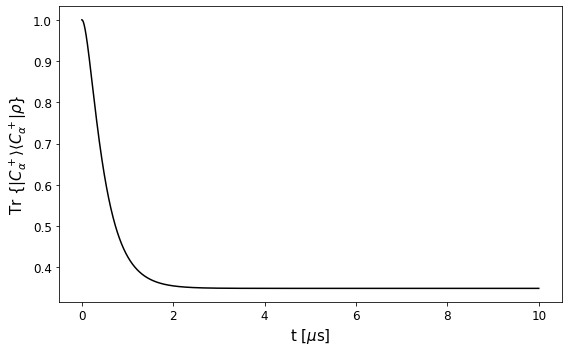

In [3]:
plt.figure(figsize=(8, 5))
plt.plot(t * KHz, result.expect[0], color="black")
plt.xlabel("t [$\mu$s]", fontsize=15)
plt.ylabel("Tr {$|C_\\alpha^+ \\rangle \langle C_\\alpha^+ | \\rho$}", fontsize=15)
plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=12)
plt.tight_layout()

plt.savefig("initialization.jpg")

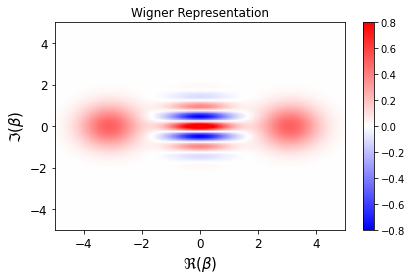

In [4]:
x = np.linspace(-5., 5., 500)

w = qt.wigner(cq.cat_states()[0], x[1:], x[1:])
w /= np.max(np.abs(w))

fig = plt.pcolormesh(x, x, w, cmap="bwr", vmin=-0.8, vmax=0.8)

plt.colorbar(fig)
plt.xlabel('$\\Re(\\beta)$', fontsize = 15)
plt.ylabel('$\\Im(\\beta)$', fontsize = 15)

plt.tick_params(axis='x', labelsize=12)

plt.tick_params(axis='y', labelsize=12)
plt.title('Wigner Representation')
plt.tight_layout()
plt.savefig("ground.jpg")
plt.show()

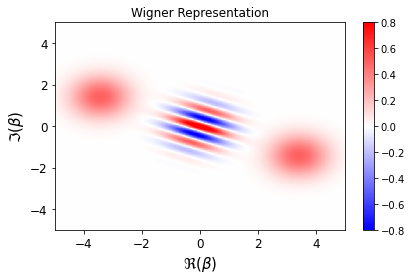

In [5]:

w = qt.wigner(result.final_state, x[1:], x[1:])
w /= np.max(np.abs(w))

fig = plt.pcolormesh(x, x, w, cmap="bwr", vmin=-0.8, vmax=0.8)

plt.colorbar(fig)
plt.xlabel('$\\Re(\\beta)$', fontsize = 15)
plt.ylabel('$\\Im(\\beta)$', fontsize = 15)

plt.tick_params(axis='x', labelsize=12)

plt.tick_params(axis='y', labelsize=12)
plt.title('Wigner Representation')
plt.tight_layout()
plt.savefig("initialized_cat.jpg")
